In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
#from scipy.interpolate import interp2d
import gsw
import os

/Users/weiyangbao/miniconda3/envs/py37/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [13]:
state0 = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/Sills/state_003.nc')
#state0 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/iceplume/sill30/state_002.nc')
state = state0.isel(Y = range(1,10)) # Remove the boundary walls in y direction
state.X

<xarray.DataArray 'X' (X: 104)>
array([  50.      ,  150.      ,  250.      ,  350.      ,  450.      ,
        550.      ,  650.      ,  750.      ,  850.      ,  950.      ,
       1050.      , 1150.      , 1250.      , 1350.      , 1450.      ,
       1550.      , 1650.      , 1750.      , 1850.      , 1950.      ,
       2050.      , 2150.      , 2250.      , 2350.      , 2450.      ,
       2550.      , 2650.      , 2750.      , 2850.      , 2950.      ,
       3050.      , 3150.      , 3250.      , 3350.      , 3450.      ,
       3550.      , 3650.      , 3750.      , 3850.      , 3950.      ,
       4049.999996, 4149.999977, 4249.999867, 4349.999308, 4449.99675 ,
       4549.986272, 4649.947789, 4749.821044, 4849.446671, 4948.454809,
       5046.097458, 5141.070863, 5231.453676, 5314.942063, 5389.500989,
       5454.319288, 5510.651866, 5562.002879, 5613.353893, 5669.686471,
       5734.504769, 5809.063696, 5892.552083, 5982.934896, 6077.9083  ,
       6175.55095 , 6274.559087,

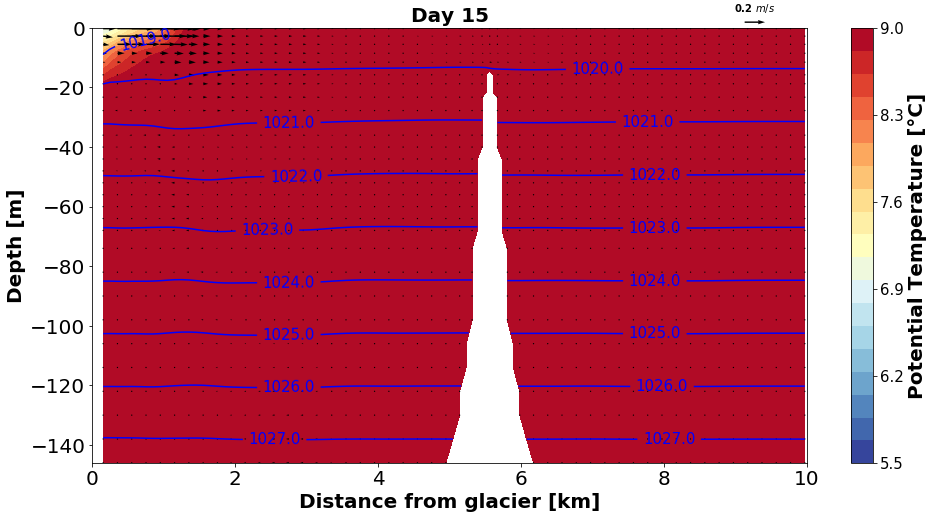

In [12]:
fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/Sill010//Along_fjord_animation_Qf0700/"
#fig_path = "/home/1959/Jupyter_Figs/sill30/Along_fjord_animation_Qf0200/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
    
x = state.X.data / 1000 # x coornidate in km
z = state.Z.data
pres = gsw.p_from_z(z, 0)
ct = np.linspace(5.5,9,20) # Contour range for temperature
count = 0

# Time range
for t in range(30,31):
    count += 1
    pt = state.Temp.isel(T = t).data
    s = state.S.isel(T = t).data
    # Convert the location of data U from cell corner to center
    u = (state.U.isel(T = t, Xp1 = range(104)).data + state.U.isel(T = t, Xp1 = range(1,105)).data) /2
    w = state.W.isel(T = t).data

    mask = (pt == 0)
    pt[mask] = np.nan
    s[mask] = np.nan
    u[mask] = np.nan
    w[mask] = np.nan
    pt_ymean = pt.mean(1)
    s_ymean = s.mean(1)
    p = np.tile(pres,[len(x),1]).T
    rho_ymean = gsw.rho(s_ymean, pt_ymean, p)
    u_ymean = u.mean(1)
    w_ymean = w.mean(1)
    

    fig, ax = plt.subplots(figsize=(16,8))  
    # Plot potential temperature field
    plt.contourf(x,z,pt_ymean, ct, cmap = 'RdYlBu_r')
    cbar = plt.colorbar(ticks = np.linspace(5.5,9,6))
    cbar.ax.tick_params(labelsize = 15)
    cbar.set_label('Potential Temperature [\N{DEGREE SIGN}C]', size = 20, weight = 'bold')
    
    # Plot isopycnals
    CS = plt.contour(x,z,rho_ymean,10, colors = 'b')
    plt.clabel(CS, fmt='%1.1f', fontsize=15, inline=1)

    # Plot velocity(Z, X) field
    u_ymean[[1,2,3,4,6,7,8,9,11,12,14,15,17,18,19,21,23,24,26,27,29,30], :] = np.nan
    w_ymean[[1,2,3,4,6,7,8,9,11,12,14,15,17,18,19,21,23,24,26,27,29,30], :] = np.nan
    u_ymean[:,::2] = np.nan
    w_ymean[:,::2] = np.nan
    #u_ymean[::2,:] = np.nan
    #w_ymean[::2,:] = np.nan   
    Q = ax.quiver(x,z,u_ymean, w_ymean, width=0.002, scale=7)
    ax.quiverkey(Q, 0.7, 0.89, 0.2,r'0.2 $m/s$', fontproperties={'weight': 'bold', 'size' : 10}, coordinates='figure')

    ax.set_xlim([0,10])
    #ax.set_xticklabels(np.linspace(0,10,6, dtype = int), size = 20)
    ax.set_ylim([min(z),0])
    #ax.set_yticklabels(np.linspace(-150,0,11, dtype = int), size = 20)
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 20)
    ax.set_xlabel('Distance from glacier [km]', size = 20, weight = 'bold')
    ax.set_ylabel('Depth [m]', size = 20, weight = 'bold')
    plt.title('Day ' + str(int(t/2)), size = 20, weight = 'bold')
    #plt.close()
    #fig.savefig(fig_path + '/time' + format(count, '03d') + '.png', dpi = 150, bbox_inches='tight')

In [6]:
# Generate GIF from saved output figures
import imageio
import glob

images = []
imagenames = sorted(glob.glob(fig_path + '/time*.png'))

for filename in imagenames:
    images.append(imageio.imread(filename))
imageio.mimsave(fig_path + '/30Day.gif', images, duration=.6)

In [9]:
len(x)

104